After having downloaded the data, we can begin exploring them. We start by loading the needed libraries:

In [1]:
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
def saveImage(ax, title, filename):
    ax.set_title(title, fontdict={"fontsize": "18", "fontweight" : "3"})
    ax.get_figure().savefig(f'../images/{filename}.png', dpi=150, bbox_inches='tight')
    return ax

We load the OpenStreetMap dataset and check its contents:

In [12]:
osm_points_of_interest = gpd.read_file("../dataset/dati_open_street.geojson")
osm_points_of_interest.head()

,categoria,categoria_openstreetmap,longitudine,tag,latitudine,identificativo,geometry
0,alimentari,shop,11.364692,alcohol,44.503922,3614799603,POINT (11.36469 44.50392)
1,alimentari,shop,11.343847,alcohol,44.497602,3813847713,POINT (11.34385 44.49760)
2,alimentari,shop,11.326771,bakery,44.499566,1230340916,POINT (11.32677 44.49957)
3,alimentari,shop,11.327456,bakery,44.494912,1230340918,POINT (11.32746 44.49491)
4,alimentari,shop,11.349364,bakery,44.500316,1704286899,POINT (11.34936 44.50032)


As we can see it contains the columns:
- categoria = category of the amenity
- categoria_openstreetmap = more general category returned by OpenStreetMap
- longitudine = longitude
- tag = specific type of amenity
- latitudine = latitude
- identificativo = id
- geometry

The categories in the data are:

In [37]:
print(", ".join(osm_points_of_interest.categoria.unique()))

alimentari, commercio, intrattenimento, istruzione, poste e banche, ristorazione, salute


As we said in the introduction, the categories of amenities required by the '15 minute city' concept should be related to living, working, commerce, healthcare, education, and entertainment. The categories in the data seem to cover all the requirements. Given the data that we have, we cannot verify the distance from the workplace.

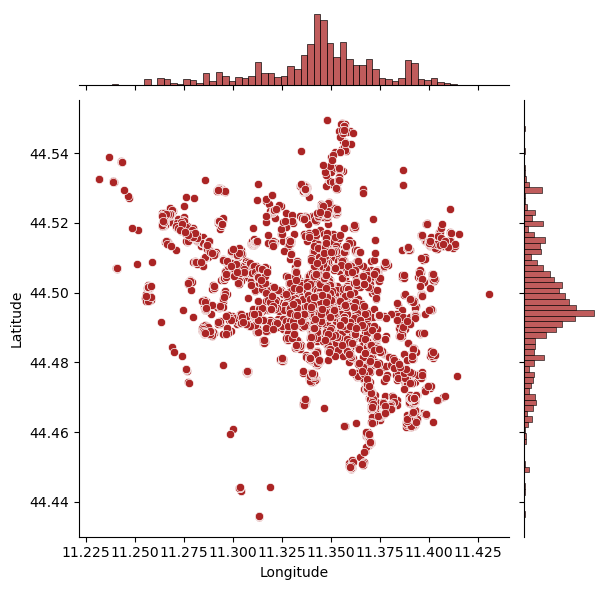

In [34]:
joint = sns.jointplot(x='longitudine', y='latitudine', color="#AB2525", data=osm_points_of_interest)
joint.set_axis_labels('Longitude', 'Latitude')

joint.figure.savefig("../images/osm_interest_distribution.png", dpi=150, bbox_inches='tight')
joint

By creating a scatterplot of the amenities, together with their distribution, we can see that they are heavily concentrated towards the middle and spread out mostly on the "main diagonal" in the plot. We also plot the distribution for the longitude and latitude independently:

In [7]:
def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2, label="Normal distribution")

<AxesSubplot: title={'center': 'Longitude distribution'}, xlabel='Longitude', ylabel='Density'>

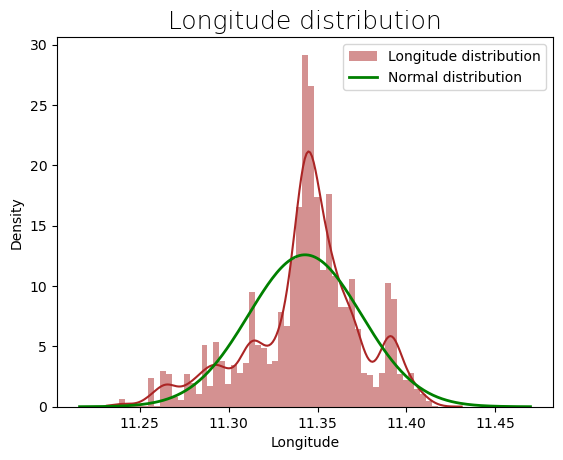

In [30]:
data = osm_points_of_interest['longitudine']
ax = sns.histplot(x=data, stat="density", kde=True, element="step", color="#AB2525", edgecolor=None, label="Longitude distribution")
ax.set_xlabel('Longitude')
normal(data.mean(), data.std(), color="green")
ax.legend(loc="upper right")

ax = saveImage(ax, "Longitude distribution", "longitude")
ax

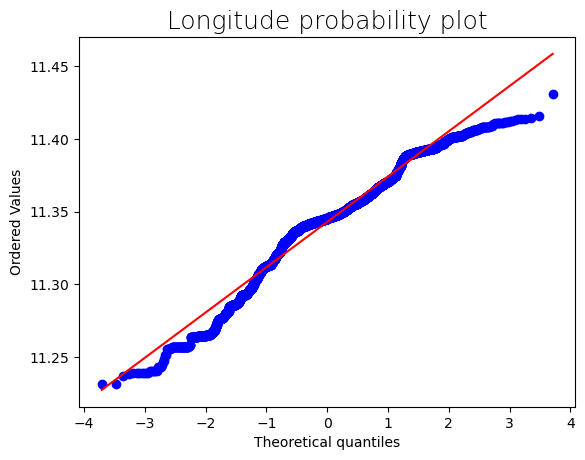

In [31]:
stats.probplot(data, dist="norm", plot=plt)
plt.title("Longitude probability plot", fontsize=18, fontweight=3)
plt.savefig("../images/longitude_probability_plot.png", dpi=150, bbox_inches='tight')
plt.show()

<AxesSubplot: title={'center': 'Latitude distribution'}, xlabel='Latitude', ylabel='Density'>

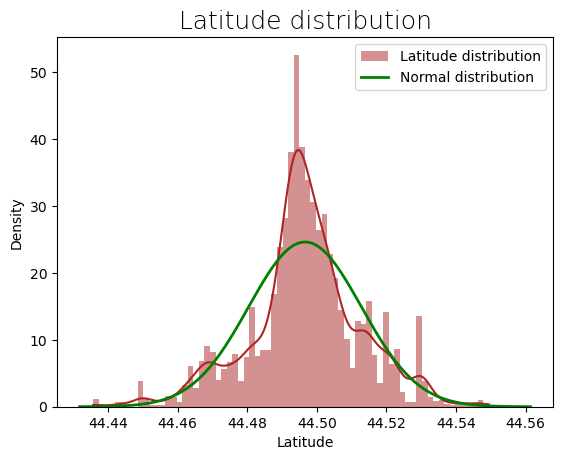

In [32]:
data = osm_points_of_interest['latitudine']
ax = sns.histplot(x=data, stat="density", kde=True, element="step", color="#AB2525", edgecolor=None, label="Latitude distribution")
ax.set_xlabel('Latitude')
normal(data.mean(), data.std(), color="green")
ax.legend(loc="upper right")

ax = saveImage(ax, "Latitude distribution", "latitude")
ax

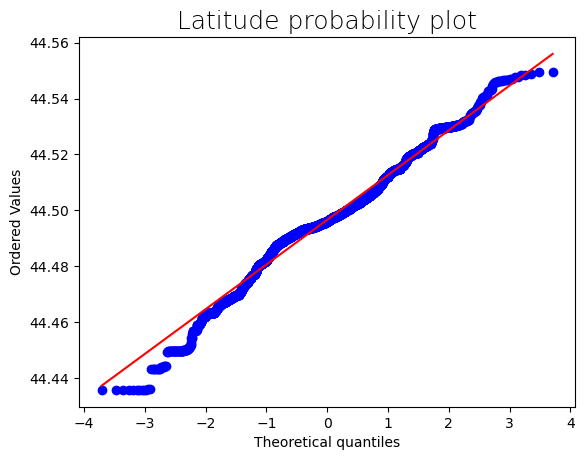

In [33]:
stats.probplot(data, dist="norm", plot=plt)
plt.title("Latitude probability plot", fontsize=18, fontweight=3)
plt.savefig("../images/latitude_probability_plot.png", dpi=150, bbox_inches='tight')
plt.show()

We can see that in both cases they are not exactly normally distributed. Anyways, they are still very concentrated in the middle.

Now we load the statistical areas dataset:

In [10]:
statistical_areas = gpd.read_file("../dataset/aree-statistiche.geojson")
statistical_areas.head()

,codice_quartiere,nome_quartiere,codice_zona,nome_zona,nome_area_statistica,codice_area_statistica,geometry
0,12,Navile,B,Bolognina,EX MERCATO ORTOFRUTTICOLO,16,"MULTIPOLYGON (((11.34588 44.50624, 11.34575 44..."
1,11,Borgo Panigale - Reno,C,Borgo Panigale,VIA DEL VIVAIO,2,"MULTIPOLYGON (((11.25132 44.55572, 11.25274 44..."
2,11,Borgo Panigale - Reno,C,Borgo Panigale,LA BIRRA,5,"MULTIPOLYGON (((11.29449 44.52433, 11.29495 44..."
3,11,Borgo Panigale - Reno,C,Borgo Panigale,RIGOSA,10,"MULTIPOLYGON (((11.26334 44.52598, 11.26080 44..."
4,13,Porto - Saragozza,F,Costa Saragozza,XXI APRILE,72,"MULTIPOLYGON (((11.31906 44.49695, 11.31915 44..."


The dataset contains various information about the areas, but we are mostly interested in the geometry. We quickly check that there is no invalid geometry:

In [22]:
statistical_areas.geometry.isna().sum()

0

Finally, we load the last dataset and check its contents:

In [7]:
population_full = gpd.read_file("../dataset/popolazione-residente-per-stato-civile-per-quartiere-zona-area-statistica-serie-.geojson")
population_full.head()

,sesso,anno,area_statistica,stato_civile,codice_area_statistica,residenti,quartiere,zona,geometry
0,Femmine,2004,Via Toscana,Coniugati/e,88,2351,Savena,San Ruffillo,"MULTIPOLYGON (((11.36605 44.47261, 11.36641 44..."
1,Maschi,2004,Via Toscana,Coniugati/e,88,2292,Savena,San Ruffillo,"MULTIPOLYGON (((11.36605 44.47261, 11.36641 44..."
2,Femmine,2004,Via Toscana,Vedovi/e,88,885,Savena,San Ruffillo,"MULTIPOLYGON (((11.36605 44.47261, 11.36641 44..."
3,Maschi,2004,Via Toscana,Vedovi/e,88,184,Savena,San Ruffillo,"MULTIPOLYGON (((11.36605 44.47261, 11.36641 44..."
4,Maschi,2004,Corelli,Celibi/nubili,89,1678,Savena,San Ruffillo,"MULTIPOLYGON (((11.37715 44.47087, 11.37738 44..."


The data starts from 2004. We don't need it, so we check the last available year:

In [23]:
population_full.anno.unique().max()

'2021'

It looks like the latest data about the population in Bologna was recorded in 2021. It makes sense, since the year 2022 was not yet over when the data was last updated. We check if there is any invalid geometry:

In [25]:
population_full.geometry.isna().sum()

157

Quite a lot of geometries are invalid. Let's have a better look at the data where this is the case:

In [14]:
population_full[population_full.geometry.isna() == True].head()

,sesso,anno,area_statistica,stato_civile,codice_area_statistica,residenti,quartiere,zona,geometry
7,Femmine,2004,non indicata,Coniugati/e,99,2,Senza fissa dimora,Senza fissa dimora,None
8,Maschi,2004,non indicata,Divorziati/e,99,5,Senza fissa dimora,Senza fissa dimora,None
9,Femmine,2004,non indicata,Vedovi/e,99,2,Senza fissa dimora,Senza fissa dimora,None
609,Maschi,2014,non indicata,Divorziati/e,99,29,Senza fissa dimora,Senza fissa dimora,None
610,Maschi,2014,non indicata,Vedovi/e,99,1,Senza fissa dimora,Senza fissa dimora,None


The Municipality of Bologna also included the homeless in the calculation of the city's population. To be sure that it's only homeless people and not other groups, we check the values for the column "quartiere":

In [35]:
print(population_full[population_full.geometry.isna() == True].quartiere.unique())
print(f"{population_full[(population_full.geometry.isna() == True) & (population_full.anno == '2021')].residenti.sum()}/{population_full[population_full.anno == '2021'].residenti.sum()} residents in Bologna were homeless in 2021.")

['Senza fissa dimora']
528/392690 residents in Bologna were homeless in 2021.


Now that we have the confirmation we wanted, we can remove the rows with invalid geometries, only keep the data for the year 2021 and save everything in a new GeoJSON file:

In [9]:
population_2021 = population_full[population_full.anno == '2021']
population_2021 = population_2021[population_2021.geometry.isna() == False]
population_2021.to_file("../dataset/population_2021.geojson", driver='GeoJSON')